# **MiniProject #1**



# **Q1 (50pts): Analyzing Neural Spike Patterns**

In [2]:
# Create 3 arrays containing spike times

import numpy as np
import matplotlib.pyplot as plt

# Neuron A: Regular neuron with no noise
neuron_a_spikes = np.arange(10, 5000, 10)

# Neuron B: Regular neuron with Gaussian noise
intervals_b = 10 + np.random.normal(0, 1, 500)
neuron_b_spikes = np.cumsum(intervals_b)
neuron_b_spikes = neuron_b_spikes[neuron_b_spikes < 5000]

# Neuron C: Bursting neuron
bursts = []
for i in range(0, 5000, 50):
    bursts.extend([i+1, i+2, i+3])
neuron_c_spikes = np.array(bursts)

print(f"Neuron A: {len(neuron_a_spikes)} spikes")
print(f"Neuron B: {len(neuron_b_spikes)} spikes")
print(f"Neuron C: {len(neuron_c_spikes)} spikes")


Neuron A: 499 spikes
Neuron B: 500 spikes
Neuron C: 300 spikes


**Part A: Visualize Spike Trains (Raster Plots)**

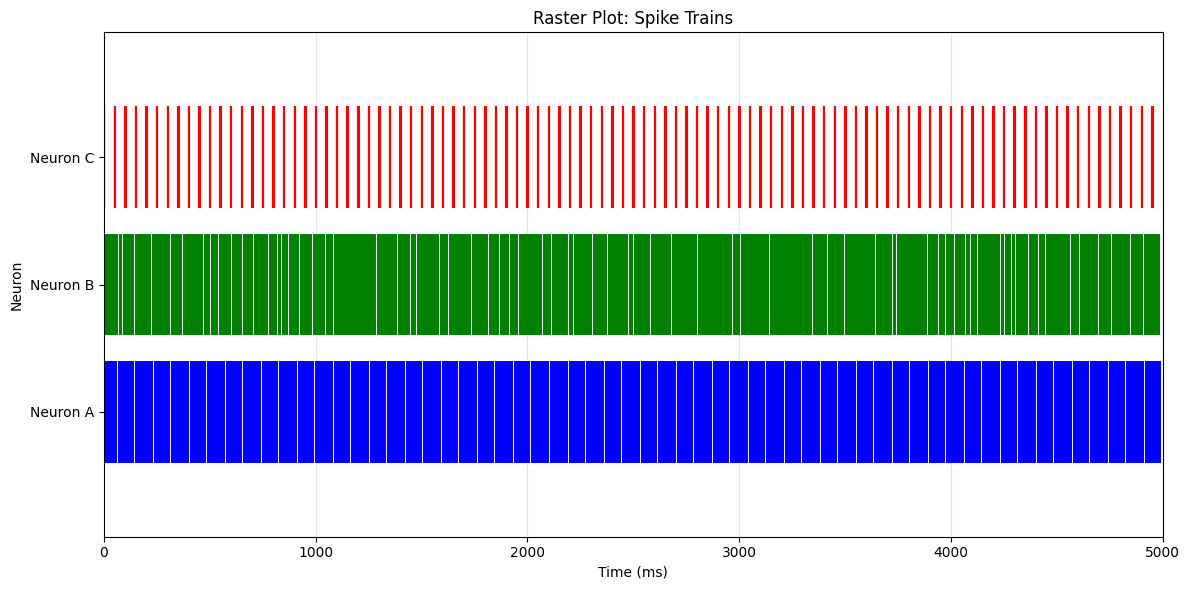

In [3]:
# Part A: Raster Plot
plt.figure(figsize=(12, 6))
plt.eventplot([neuron_a_spikes, neuron_b_spikes, neuron_c_spikes],
              colors=['blue', 'green', 'red'],
              lineoffsets=[1, 2, 3],
              linelengths=0.8)
plt.yticks([1, 2, 3], ['Neuron A', 'Neuron B', 'Neuron C'])
plt.xlabel('Time (ms)')
plt.ylabel('Neuron')
plt.title('Raster Plot: Spike Trains')
plt.xlim(0, 5000)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

**Part A: Questions**:

---
**What did you see?** **Did the results match your expectations?**

* Neuron A: Spikes occur at equal intervals of 10 ms, creating a regular
firing pattern. This matches expectations for a noise-free neuron.

* Neuron B: Spikes happen roughly every 10 ms but with small random deviations from the exact timing. The pattern shows variability, as expected with Gaussian noise added.

* Neuron C: On the raster plot, this neuron appears visually similar to Neuron A, showing regular activity with ~50 ms periodicity. However, at this time scale, individual bursts (3 spikes within 3 ms) are too close together to be seen visually, so they appear as single marks.






**Part B: Analyze Inter-Spike Intervals (ISI)**

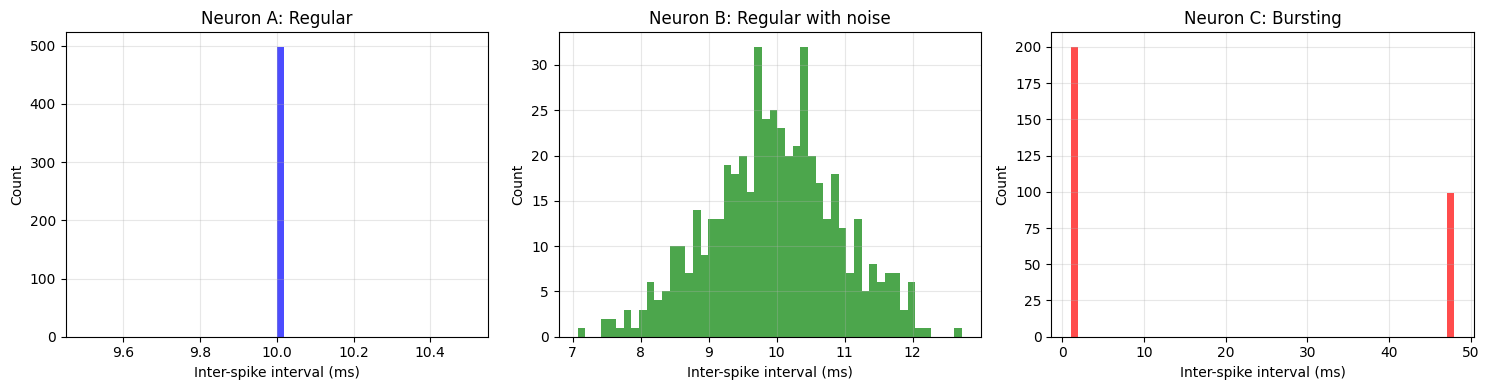

In [4]:
# Calculate the ISI for each neuron
isi_a = np.diff(neuron_a_spikes)
isi_b = np.diff(neuron_b_spikes)
isi_c = np.diff(neuron_c_spikes)

# Histograms ISI
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

axes[0].hist(isi_a, bins=50, color='blue', alpha=0.7)
axes[0].set_xlabel('Inter-spike interval (ms)')
axes[0].set_ylabel('Count')
axes[0].set_title('Neuron A: Regular')
axes[0].grid(alpha=0.3)

axes[1].hist(isi_b, bins=50, color='green', alpha=0.7)
axes[1].set_xlabel('Inter-spike interval (ms)')
axes[1].set_ylabel('Count')
axes[1].set_title('Neuron B: Regular with noise')
axes[1].grid(alpha=0.3)

axes[2].hist(isi_c, bins=50, color='red', alpha=0.7)
axes[2].set_xlabel('Inter-spike interval (ms)')
axes[2].set_ylabel('Count')
axes[2].set_title('Neuron C: Bursting')
axes[2].grid(alpha=0.3)

plt.tight_layout()
plt.show()

**Part B: Questions:**

---

* **What does the ISI histogram look like for a perfectly regular neuron?**
Regular neuron (A): The ISI histogram shows one peak at 10 ms because all inter-spike intervals are identical.

* **How does noise affect the ISI distribution?**
Noisy neuron (B): The distribution forms a Gaussian curve centered around 10 ms. Gaussian noise adds random deviations to each interval, creating a normal distribution of ISIs.

* **What distinguishes a bursting neuron's ISI histogram from a regular neuron's?**
A bursting neuron's ISI histogram shows a bimodal distribution (two separate peaks), while a regular neuron shows only one peak.
The histogram reveals two distinct peaks (bimodal distribution):
*First peak* (1 ms) represents intra-burst intervals between spikes within a burst.
*Second peak* (47 ms) represents inter-burst intervals between bursts. This bimodal structure reveals the bursting behavior that wasn't visible in the raster plot.

**Part C: Generate and Classify Your Own Neuron**

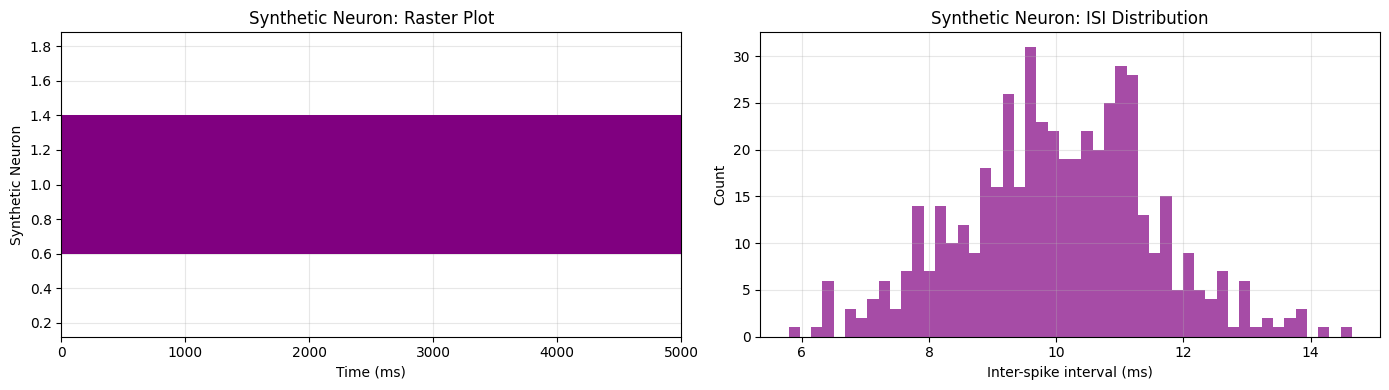

In [5]:
mean_interval = 10
std_interval = 1.5

intervals_synthetic = np.random.normal(mean_interval, std_interval, 600)
intervals_synthetic = np.maximum(intervals_synthetic, 1)  # минимум 1 мс
synthetic_spikes = np.cumsum(intervals_synthetic)
synthetic_spikes = synthetic_spikes[synthetic_spikes < 5000]

isi_synthetic = np.diff(synthetic_spikes)

# Visualization of synthetic neuron
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

# Raster plot
axes[0].eventplot([synthetic_spikes], colors=['purple'], lineoffsets=[1], linelengths=0.8)
axes[0].set_xlabel('Time (ms)')
axes[0].set_ylabel('Synthetic Neuron')
axes[0].set_title('Synthetic Neuron: Raster Plot')
axes[0].set_xlim(0, 5000)
axes[0].grid(alpha=0.3)

# ISI histogram
axes[1].hist(isi_synthetic, bins=50, color='purple', alpha=0.7)
axes[1].set_xlabel('Inter-spike interval (ms)')
axes[1].set_ylabel('Count')
axes[1].set_title('Synthetic Neuron: ISI Distribution')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

**Part С: Questions:**

---

* **Which neuron type (A, B, or C) does your synthetic neuron most closely resemble?**
My neuron resembles Neuron B (regular neuron with Gaussian noise).

* **What features of the ISI histogram led you to this conclusion?**
The ISI histogram shows a unimodal Gaussian distribution centered around 10 ms, similar to Neuron B. Unlike Neuron A, which has a single peak, my synthetic neuron's distribution is spread out due to noise. Unlike Neuron C, there's no bimodal structure, just one bell-shaped peak indicating regular firing with variability.

* **How does changing the standard deviation parameter affect the ISI distribution?**
Increasing the standard deviation makes the ISI distribution wider and flatter, spreading values over a larger range around the mean. Decreasing it makes the distribution narrower and more peaked, approaching the sharp single peak of Neuron A. Essentially, higher standard deviation = more variability and less predictable firing pattern.

# **Q2 (50pts): Dataset “laptop-price”**

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv("/content/laptop_price - dataset.csv")
data.head()

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro)
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.3,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.8,8,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel,Core i5 7200U,2.5,8,256GB SSD,Intel,HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.7,16,512GB SSD,AMD,Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,3.1,8,256GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37,1803.60


**1) Plot the price of all the laptops**

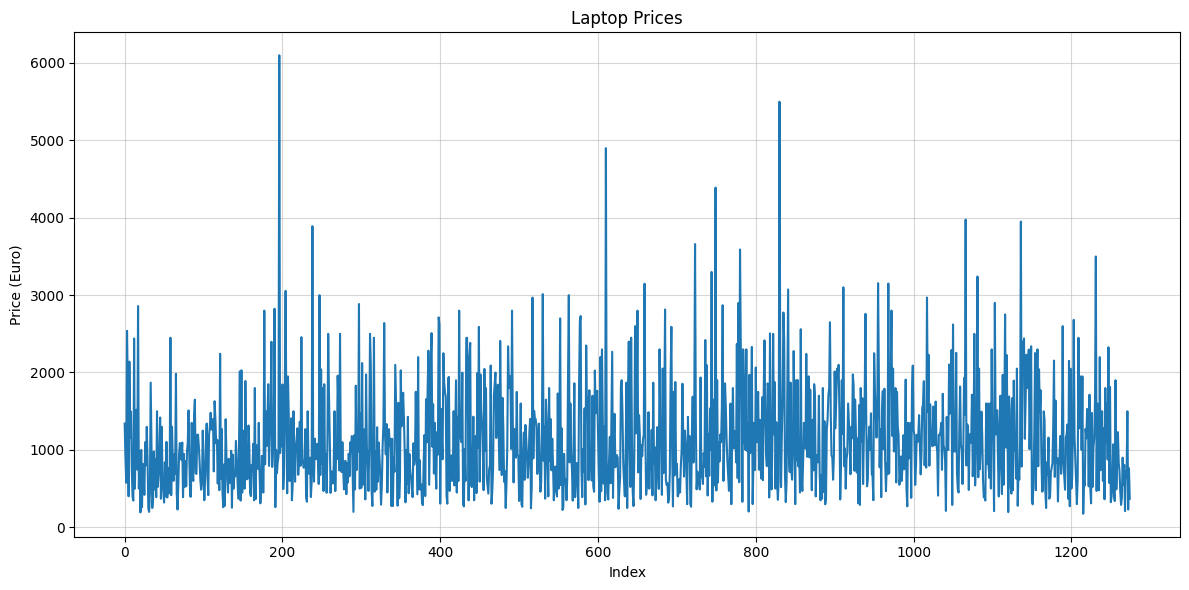

In [8]:
prices = data["Price (Euro)"]

# Plot prices
plt.figure(figsize=(12, 6))
plt.plot( prices, marker='', linestyle='-', markersize=0.3)
plt.xlabel('Index')
plt.ylabel('Price (Euro)')
plt.title('Laptop Prices')
plt.tight_layout()
plt.grid(alpha=0.5)
plt.show()


**2) Which company has on average the most expensive laptop? What is the average
laptop price for each company?**

In [20]:
# Average laptops' prices by company
mean = data.groupby('Company')['Price (Euro)'].mean()
mean


,Price (Euro)
Company,
Acer,633.464455
Apple,1564.198571
Asus,1123.829737
Chuwi,314.296667
Dell,1199.225120
Fujitsu,729.000000
Google,1677.666667
HP,1080.314664
Huawei,1424.000000


In [22]:
# Most expensive laptop
expensive = mean.sort_values(ascending=False).head(1)
expensive

,Price (Euro)
Company,
Razer,3346.142857


**3) Find the different types of Operating systems present in the data - under the
column name "OpSys".
Please note - there are operating systems that are the same systems and
just written differently in the column - please fix them to be uniform.**

In [69]:
data['OpSys'] = data['OpSys'].replace('Mac OS X', 'macOS')

In [70]:
data['OpSys']

,OpSys
0,macOS
1,macOS
2,No OS
3,macOS
4,macOS
...,...
1270,Windows 10
1271,Windows 10
1272,Windows 10
1273,Windows 10


**4) Plot for each of the operating system types the distribution of the prices, so that
the number of plots equals to the number of unique operating systems.**

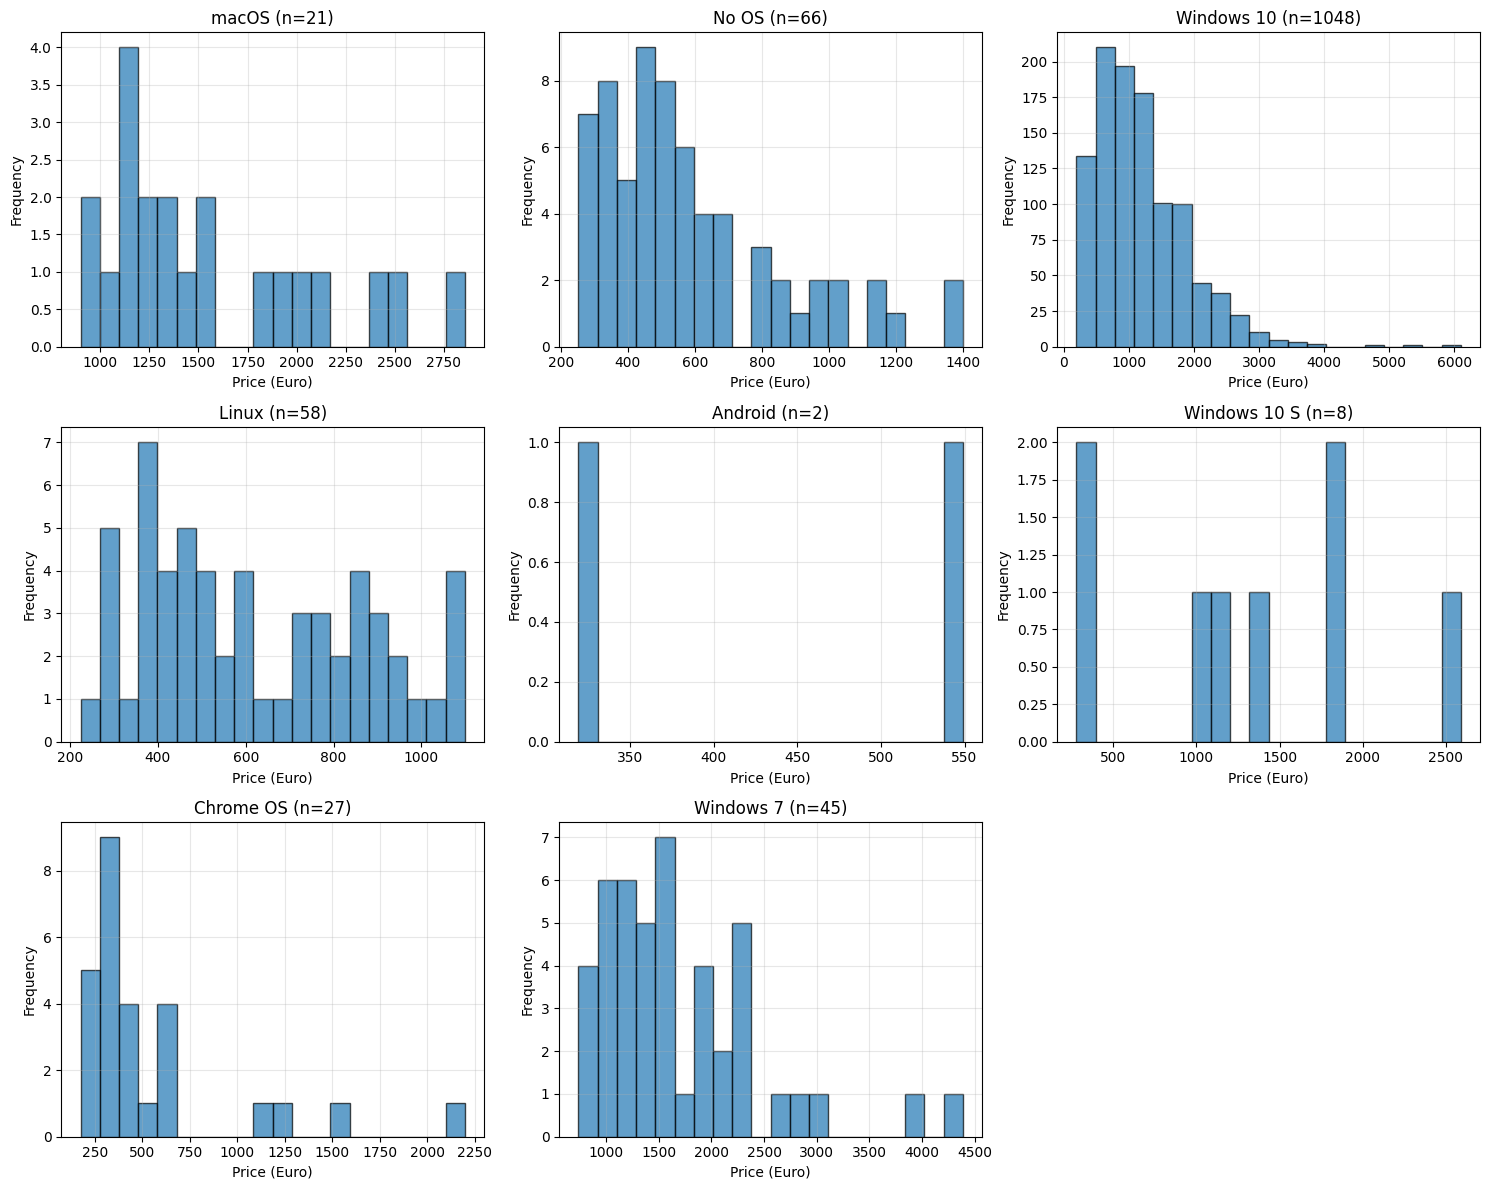

In [76]:
unique_os = data['OpSys'].unique()
n_os = len(unique_os)

# Grid dimensions
n_cols = 3
n_rows = (n_os + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten()

for idx, os_name in enumerate(unique_os):
    os_data = data[data['OpSys'] == os_name]['Price (Euro)']

    axes[idx].hist(os_data, bins=20, edgecolor='black', alpha=0.7)
    axes[idx].set_xlabel('Price (Euro)')
    axes[idx].set_ylabel('Frequency')
    axes[idx].set_title(f'{os_name} (n={len(os_data)})')
    axes[idx].grid(alpha=0.3)

# Hide the 10th subplot
for idx in range(n_os, len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()


**5) What is the relationship between RAM and computer price? add an adequate
plot to support your findings. <<< check data for outliers, what would be
considered as an outlier? How will you detect it would you? >>>**

In [81]:
ram = data['RAM (GB)']

# Correlation
corr_coef = ram.corr(prices)
print(f"Correlation between RAM and price: {round(corr_coef, 2)}")

# Outlier
Q1 = prices.quantile(0.25)
Q3 = prices.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data[(prices < lower_bound) | (prices > upper_bound)]
print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")
print(f"Number of outliers: {len(outliers)}")



Correlation between RAM and price: 0.74
Lower bound: -722.25, Upper bound: 2827.75
Number of outliers: 28


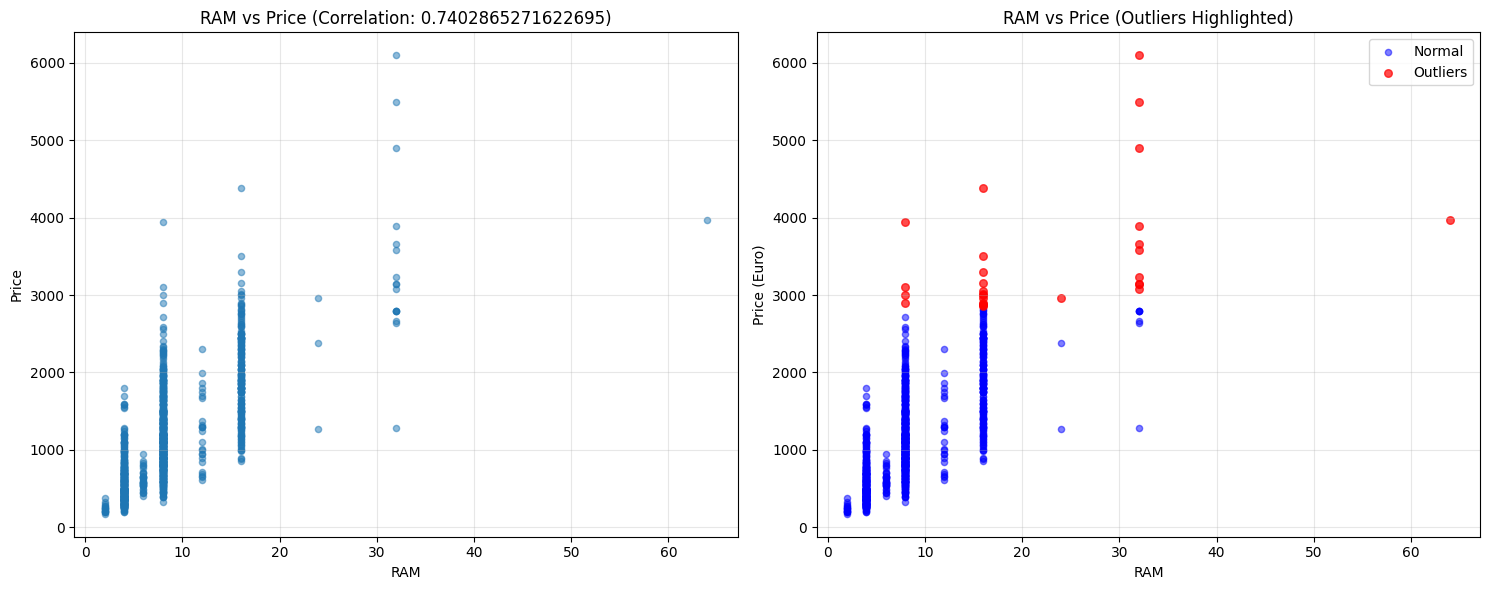

In [79]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Scatter plot
axes[0].scatter(ram, prices, alpha=0.5, s=20)
axes[0].set_xlabel('RAM')
axes[0].set_ylabel('Price')
axes[0].set_title(f'RAM vs Price (Correlation: {corr_coef})')
axes[0].grid(alpha=0.3)

# Scatter plot with outliers
normal_data = data[(prices >= lower_bound) & (prices <= upper_bound)]
axes[1].scatter(normal_data['RAM (GB)'], normal_data['Price (Euro)'],
                alpha=0.5, s=20, label='Normal', color='blue')
axes[1].scatter(outliers['RAM (GB)'], outliers['Price (Euro)'],
                alpha=0.7, s=30, label='Outliers', color='red')
axes[1].set_xlabel('RAM')
axes[1].set_ylabel('Price (Euro)')
axes[1].set_title('RAM vs Price (Outliers Highlighted)')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

**6) Create a new column for the dataframe called "Storage type" that extracts the
storage type from the column "Memory".
o For example, in the first row in the column "Memory" it states "128GB
SSD", the new column will have just "SSD" in its first row.**

In [83]:
print(data['Storage type'].value_counts())

def extract_storage_type(memory_str):
    if pd.isna(memory_str):
        return 'Unknown'
    memory_str = str(memory_str).upper()

    if 'SSD' in memory_str:
        return 'SSD'
    elif 'HDD' in memory_str:
        return 'HDD'
    elif 'FLASH' in memory_str:
        return 'Flash'
    elif 'HYBRID' in memory_str:
        return 'Hybrid'
    else:
        return 'Other'

data['Storage type'] = data['Memory'].apply(extract_storage_type)

print(data[['Memory', 'Storage type']].head(10))

Storage type
SSD       837
HDD       360
Flash      70
Hybrid      8
Name: count, dtype: int64
                Memory Storage type
0            128GB SSD          SSD
1  128GB Flash Storage        Flash
2            256GB SSD          SSD
3            512GB SSD          SSD
4            256GB SSD          SSD
5            500GB HDD          HDD
6  256GB Flash Storage        Flash
7  256GB Flash Storage        Flash
8            512GB SSD          SSD
9            256GB SSD          SSD
